In [580]:
import cv2 
import pytesseract
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
tessdata_dir_config = '-c preserve_interword_spaces=1  --psm 3 --dpi 300'

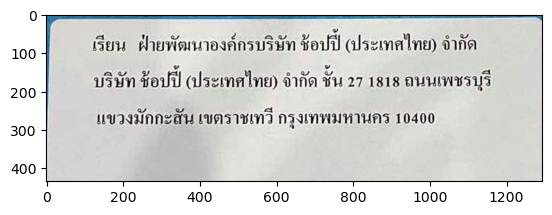

In [581]:

image = cv2.imread('image5.jpg', 1)
image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
# image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
plt.imshow(image)

In [582]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


In [583]:
# ray = get_grayscale(image)
# thresh = thresholding(gray)

In [584]:
# plt.imshow(thresh)
# cv2.imshow('img', thresh)
# cv2.waitKey(0)

In [585]:
# text = pytesseract.pytesseract.image_to_string(thresh,lang='eng+tha', config=tessdata_dir_config)
# print(text)

In [586]:
# from pythainlp import correct
# print(correct('คอมเพลีกซ์'))

Add contrast 

y

เรียน ฝ่ายพัฒนาองค์กรบริษัท ช้อปปี (ประเทศไทย) dina

บริษัท ซ้อปปี (ประเทศไทย) จํากัด ชัน 27 1818 ถนนเพชรบุรี

แขวงมักกะสัน เขตราชเทวี กรุงเทพมหานคร 10400



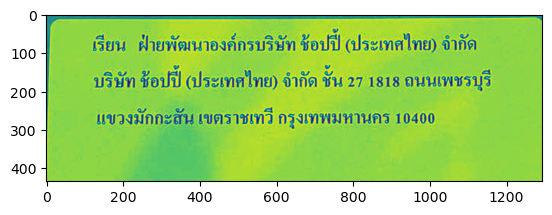

In [587]:
# lab= cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
# l_channel, a, b = cv2.split(lab)
# clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(1,1))
# cl = clahe.apply(l_channel)
# limg = cv2.merge((cl,a,b))
# enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
gray = get_grayscale(image)
thresh = thresholding(gray)
plt.imshow(gray)
text = pytesseract.pytesseract.image_to_string(thresh,lang='tha+eng', config=tessdata_dir_config)
print(text)

In [588]:
# image = cv2.imread('image1.jpg', 1)
# image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
# print(int(image.shape[0]))
# print(int(image.shape[1]))
# print('*'*50)
# print(int(image.shape[0]/3),int(image.shape[0]/3)*2)
# print(int(image.shape[1]/4),int(image.shape[1]/4)*3)
# print('*'*50)
# # for i in range(3):
# #     y  = int(i*image.shape[0]/3)
# #     yh = int(image.shape[0]/3*(i+1))
# #     x  = int(i*image.shape[1]/3)
# #     xw = int(image.shape[1]/3*(i+1))
# #     print(i,y,yh,x,xw)
# #     # print(i,i*int(image.shape[0]/3),int(image.shape[0]/3)*(i+1),i*int(image.shape[1]/3),int(image.shape[1]/3)*(i+1))
# #     # cv2.imshow('img', image[y:yh,x:xw])
# #     # cv2.waitKey(0)
# #     cv2.rectangle(image, (x, y), (xw, yh), (36,255,12), 2)
# # # plt.imshow(image[0:1066, 0:800])
# plt.imshow(image[1066:2132,600:1800])

Y : 1066
X : 1066


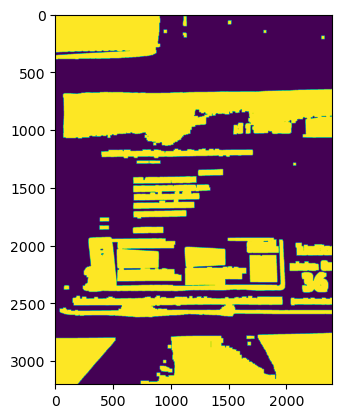

In [594]:


image = cv2.imread('image1.jpg', 1)
image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
# image = image[int(image.shape[0]/3):(int(image.shape[0]/3)*2)]
print('Y :',int(image.shape[0]/3))
print('X :',int(image.shape[0]/3))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
dilate = cv2.dilate(thresh, kernel, iterations=4)
cv2.imwrite('dilate.png',dilate)
plt.imshow(dilate)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

Y : 1066
X : 1066
3046 3097 909 1010
**************************************************
2996 3015 937 956
**************************************************
2865 2889 977 1000
**************************************************
2838 2863 1665 1688
**************************************************
2802 3200 0 519
**************************************************
2786 2806 1657 1719
**************************************************
2761 3200 743 2400
**************************************************
2457 2516 2038 2400
**************************************************
2439 2618 44 2400
**************************************************
2350 2380 81 118
**************************************************
2234 2405 2132 2356
**************************************************
2142 2218 2029 2274
**************************************************
2133 2219 2296 2400
**************************************************
2088 2316 1682 1916
**************************************************
20

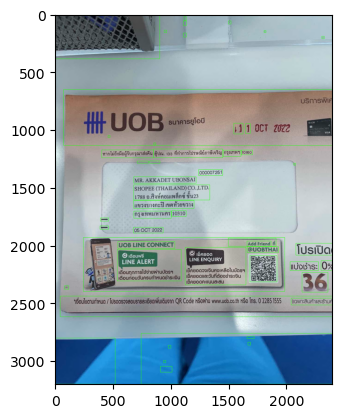

In [600]:
import cv2
import numpy as np

image = cv2.imread('image1.jpg', 1)
image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
# image = image[int(image.shape[0]/3):(int(image.shape[0]/3)*2)]
print('Y :',int(image.shape[0]/3))
print('X :',int(image.shape[0]/3))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations=4)
cv2.imwrite('dilate.png',dilate)

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    # print(x,y,w,h)
    print(y,y+h,x,x+w)
    # if(y>600 and y<900):
    # plt.imshow(image[918:951,334:470])
    print('*'*50)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    
    # if(len(pytesseract.pytesseract.image_to_string(image[y:int(y + h), x:int(x + w)],lang='eng+tha', config=tessdata_dir_config))>70):
    #     # plt.imshow(image[y:int(y + h), x:int(x + w)])
    #     lab= cv2.cvtColor(image[y:int(y + h), x:int(x + w)], cv2.COLOR_BGR2LAB)
    #     l_channel, a, b = cv2.split(lab)
    #     clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(18,18))
    #     cl = clahe.apply(l_channel)
    #     limg = cv2.merge((cl,a,b))
    #     enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    #     gray = get_grayscale(enhanced_img)
    #     thresh = thresholding(gray)
    #     # plt.imshow(thresh)
    #     print(len(pytesseract.pytesseract.image_to_string(image[y:int(y + h), x:int(x + w)],lang='eng+tha', config=tessdata_dir_config)))
    # # cv2.imshow('img', thresh)
    # # cv2.waitKey(0)
    #     print(pytesseract.pytesseract.image_to_string(thresh,lang='eng+tha', config=tessdata_dir_config))
    #     print('*'*50)
    # else:
    #     pass

# # cv2.imwrite('rectangle.png',image)
plt.imshow(image)